# Overview    
    - We have seen evidence of global warming in our other tests on Co2 emission. 
    - We wish to use the same time range for this hypothesis.
    - We have Data across US states for all occurances of tornadoes from 1950- present
    - We break it into two Intervals: A (1950-1984) and B (1985-2015)
    
# Question I:
### Claim: that Global warming has an effect on number of Tornadoes experienced in the US

    - Our NULL hypothesis is the mean yearly occurance or tornadoes remain the same,
    - Our Alternative Hypothesis is mean yearly occurrance is different in the two intervals.
#### We wish to do a t-test to compare the mean rate of monthly occurance of tornadoes
    


In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./1950-2017_all_tornadoes_prelim.csv")

In [3]:
tdata = data.groupby(['mo']).size().reset_index(name='counts')

In [4]:
# Split data into two intervals
t_old = data.loc[(data['yr']>=1955) & (data['yr']<1985)].groupby(['mo']).size().reset_index(name='counts')
t_new = data.loc[(data['yr']>=1985) & (data['yr']<=2015)].groupby(['mo']).size().reset_index(name='counts')

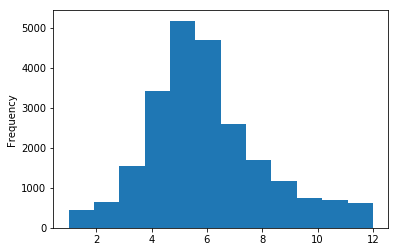

In [5]:
# This is the yearly distribution of tornadoes prior to 1985
plt.figure()
data.loc[(data['yr']>=1955) & (data['yr']<1985)]['mo'].plot.hist(bins=12)
plt.show()

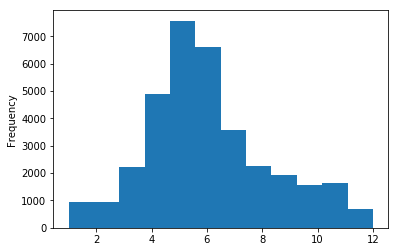

In [6]:
# This is the yearly distribution of tornadoes prior to 1985
plt.figure()
data.loc[(data['yr']>=1985) & (data['yr']<2015)]['mo'].plot.hist(bins=12)
plt.show()

### Here we run t-test and get the corresponding p-value of the test

In [7]:
# P value of the test
tstatistic, pval = stats.ttest_ind(t_new['counts'],t_old['counts'], equal_var = False)

In [8]:
print('T-statistic is: ', tstatistic)
print('P-value of test is: ', pval)

T-statistic is:  1.2583881077225103
P-value of test is:  0.22303555399026948


So we can Accept the NULL Hypothesis.

# Question 2:
### Dixie Alley Tornado Zone Phenomenon is an urban myth
This hypothesis needs verification of several questions:
    - (a) Observing whether the change has happened in Dixie alley from interval A to interval B
    - (b) Observing whether the change is consistent in original tornado alley as well
    - (c) In interval B, If mean has changes in Dixie Alley compared to Tornado Alley

#### Part A
Claim: Mean frequency of Tornadoes experienced in Dixie Alley has changed from prior to 1985
     - H0: The mean frequency of tornadoes seen remains same before and after 1985
     - H1: There is a shift in the mean frequency of tornadoes observed


In [9]:
original_tornado_alley = ['TX','OK','KS','SD','IA','IL','MO','NE','CO','ND','MN']
dixie_alley_states = ['LA','MS','AL','GA','SC','TX','AR','NC','MO']

In [10]:
t_old_dixie = data.loc[data['st'].apply(lambda x: True if x in dixie_alley_states else False) & (data['yr']>=1955) & (data['yr']<1985)].groupby(['mo']).size().reset_index(name='counts')
t_new_dixie = data.loc[data['st'].apply(lambda x: True if x in dixie_alley_states else False) & (data['yr']>=1985) & (data['yr']<2015)].groupby(['mo']).size().reset_index(name='counts')

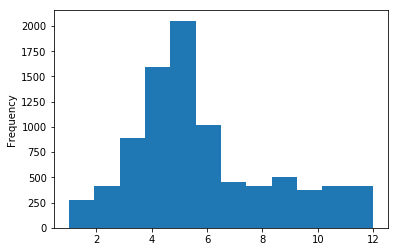

In [11]:
# Distribution of dixie alley tornado distribution before 1985
plt.figure()
data.loc[data['st'].apply(lambda x: True if x in dixie_alley_states else False) & (data['yr']>=1955) & (data['yr']<1985)]['mo'].plot.hist(bins=12)
plt.show()

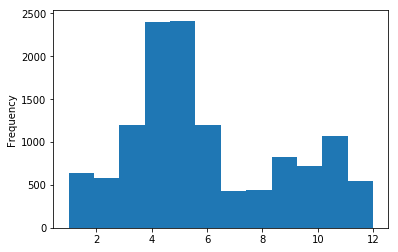

In [12]:
# Distribution of dixie alley tornado distribution before 1985
plt.figure()
data.loc[data['st'].apply(lambda x: True if x in dixie_alley_states else False) & (data['yr']>=1985) & (data['yr']<2015)]['mo'].plot.hist(bins=12)
plt.show()

In [13]:
# Here's the t-test and p-value of it
stats.ttest_ind(t_new_dixie['counts'],t_old_dixie['counts'], equal_var = False)

Ttest_indResult(statistic=1.1819620723243425, pvalue=0.25037233729279673)

We accept NULL

#### Part B
Claim: Tornado activity i.e mean frequency of observed tornadoes in Tornado alley has reduced
    - H0: Mean of frequency distribution of observed tornadoes has not changed from prior to 1985
    - H1: Mean of frequency distribution has changed from prior to 1985

In [14]:
t_old_tor = data.loc[data['st'].apply(lambda x: True if x in original_tornado_alley else False)& (data['yr']>=1955) & (data['yr']<1985)].groupby(['mo']).size().reset_index(name='counts')
t_new_tor = data.loc[data['st'].apply(lambda x: True if x in original_tornado_alley else False)& (data['yr']>=1985) & (data['yr']<2015)].groupby(['mo']).size().reset_index(name='counts')

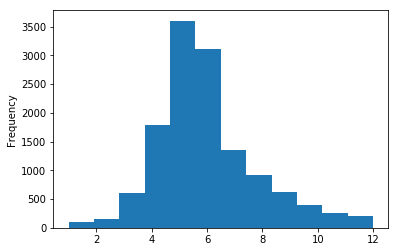

In [15]:
plt.figure()
data.loc[data['st'].apply(lambda x: True if x in original_tornado_alley else False)& (data['yr']>=1955) & (data['yr']<1985)]['mo'].plot.hist(bins=12)
plt.show()

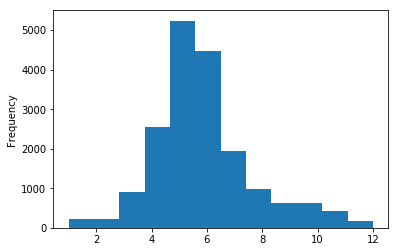

In [16]:
plt.figure()
data.loc[data['st'].apply(lambda x: True if x in original_tornado_alley else False)& (data['yr']>=1985) & (data['yr']<2015)]['mo'].plot.hist(bins=12)
plt.show()

In [17]:
# Following is the t-statistic and the p-value
stats.ttest_ind(t_new_tor['counts'],t_old_tor['counts'], equal_var = False)

Ttest_indResult(statistic=0.7349917998610942, pvalue=0.47108578855162664)

We accept NULL

### Part C:
Claim: Mean of Frequency distribution of Tornadoes seen in Tornado Alley and Dixie Alley are different post 1985
    - H0: Mean of frequency distribution of tornadoes in Tornado Alley and Dixie Alley remains same post 1985
    - H1: Mean of frequency distribution of tornadoes in Tornado alley and Dixie Alley differ


In [18]:
stats.ttest_ind(t_new_tor['counts'],t_new_dixie['counts'], equal_var = False)

Ttest_indResult(statistic=0.9285004022089426, pvalue=0.36834491450362783)

We accept NULL